# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

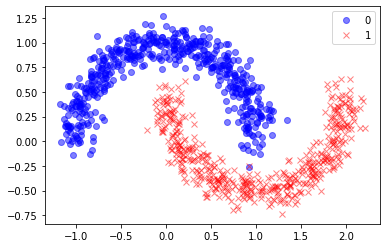

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

### Shallow Model

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

**Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten worden bepaald tijdens de training**

![graph](../data/Opdracht5-1_graph.png)

In [8]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
results = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8433


In [10]:
results

[0.31787535548210144, 0.8433333039283752]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.843


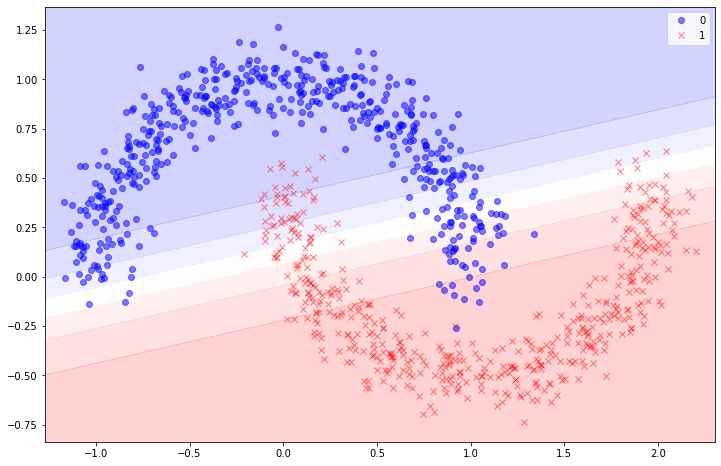

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

**Waarom werkt het shallow model hier niet?**
Het model heeft geen hidden layers en is daarom shallow. Dit gebrek aan layers zorgt ervoor dat de neuronen vereist om patronen te vinden niet aanwezig zijn.


### Deep model

In [13]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

**Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten worden bepaald tijdens de training. Hoeveel lagen heeft dit netwerk?**

![graph](../data/Odpracht5-2_graph.png)

**Welke optimizer wordt hier toegepast? Leg in eigen woorden uit wat i.h.a. de functie is van een optimizer.**
De optimizer die wordt toegepast is een Adam optimizer. Een optimizer veranderd de attributen van je model zoals weight and learning rate om zo minder data te verliezen.


In [14]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 667us/step - loss: 0.0058 - accuracy: 0.9967


[0.0057942746207118034, 0.996666669845581]

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.997
The Accuracy score on the Test set is:	0.997


**Wat is je conclusie op basis van accuracy scores van de trainingset en de testset? M.a.w. hoe goed is classificatie?**
De beste accuracy score die je kan hebben is 1, heft model heeft een resultaat van 0.997 dus dat is heel goed.


**Is hier sprake van overfitting? Licht je antwoord toe**

de accuracy met 100 epochs:
![100 epochs](../data/Opdracht5-2_100ep.png)

de accuracy met 10 epochs:
![10 epochs](../data/Opdracht5-2_10ep.png)

De accuracy is met 10x minder epochs bijna exact hetzelfde. Wij zijn daarom van mening dat er spraken is van overfitting.


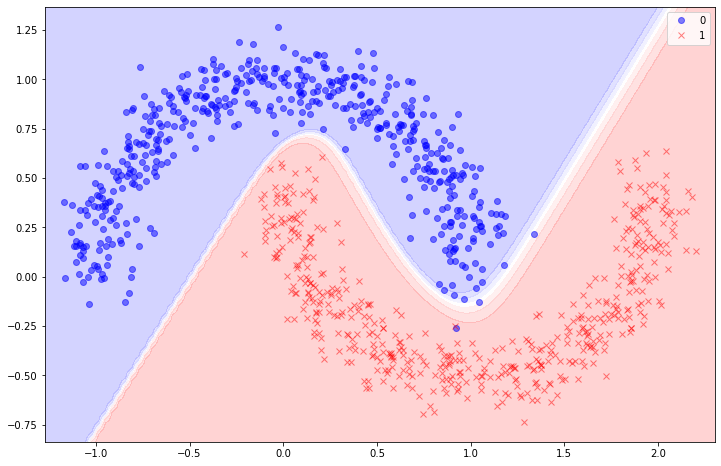

In [18]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [19]:
df = pd.read_csv('../data/iris.csv')

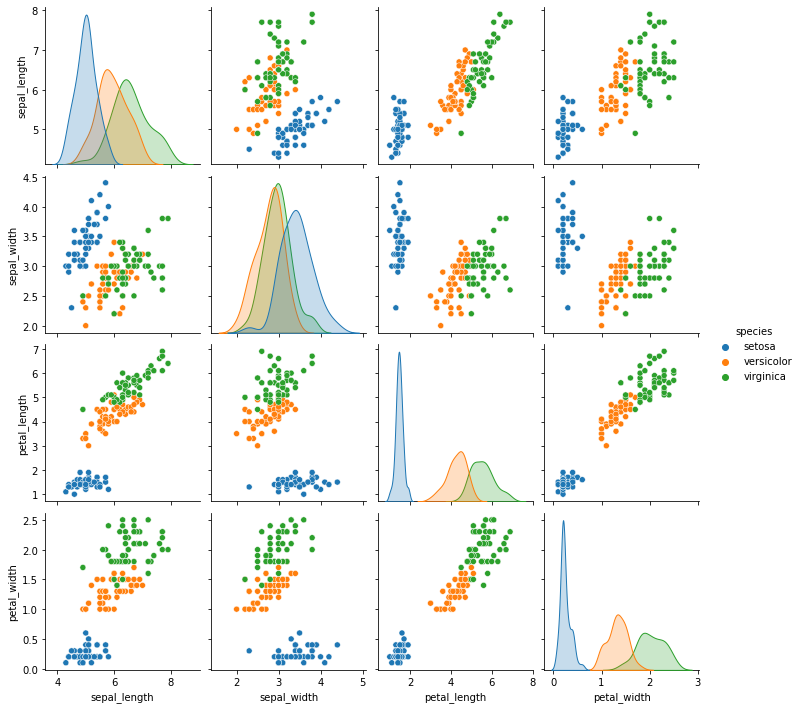

In [20]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [24]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [25]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
y_cat = to_categorical(y)

In [28]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [57]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.8),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten worden bepaald tijdens de training. Hoeveel lagen heeft dit netwerk?**

 ![IrisNNGraph.png](../data/IrisNNGraph.png)

**In dit model wordt als activation function softmax gebruikt. Waarom wordt daarvoor hier gekozen?**
Softmax is een activation function die vaak wordt gebruikt als data klasse meer dan twee klasse labels heeft. Wat zo is want er zijn er namelijk 4: sepal_length, sepal_width, petal_length, petal_width.

**Onderzoek de invloed van de learning rate op het leerproces. Probeer verschillende waarden uit. Kijk ook welke informatie je hierover kunt vinden op het Internet. Wat is je conclusie?**


In [58]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
4/4 [==============================] - 0s 32ms/step - loss: 10.8749 - accuracy: 0.1667 - val_loss: 5.6906 - val_accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 0s 7ms/step - loss: 5.0144 - accuracy: 0.2963 - val_loss: 5.4496 - val_accuracy: 0.4167
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 7.1138 - accuracy: 0.3426 - val_loss: 3.6187 - val_accuracy: 0.2500
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 3.0999 - accuracy: 0.4074 - val_loss: 1.0783 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 0s 6ms/step - loss: 0.9640 - accuracy: 0.6852 - val_loss: 2.4080 - val_accuracy: 0.4167
Epoch 6/20
4/4 [==============================] - 0s 7ms/step - loss: 1.4430 - accuracy: 0.5463 - val_loss: 0.6904 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 0s 5ms/step - loss: 0.5536 - accuracy: 0.7037 - val_loss: 0.5151 - val_accuracy: 0.7500
Epoch 8/20
4/4 [================

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred[:5]

array([[3.8332563e-02, 4.9088931e-01, 4.7077814e-01],
       [9.7551972e-01, 2.4351992e-02, 1.2830560e-04],
       [9.6956766e-01, 3.0164529e-02, 2.6774575e-04],
       [1.5853972e-03, 2.4631168e-01, 7.5210297e-01],
       [4.1994728e-02, 5.0494665e-01, 4.5305860e-01]], dtype=float32)

**Is hier sprake van overfitting? Licht je antwoord toe**

Model fitted met 20 epochs:
 ![20 epochs](../data/Opdracht5-3_20ep.png)

Model fitted met 15 epochs:
 ![15 epochs](../data/Opdracht5-3_15ep.png)

de accuracy van 15 epochs is gelijk aan die van 20, daar komt dus hetzelfde resultaat uit waardoor het model overfitted is met 20 epochs.

In [49]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.86      0.86      0.86         7
           2       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



**Leg de betekenis van de waarden in het classification report uit, t.w. precision, recall en f1 score.**
Precision is het percentage van hoeveel voorspellingen correct zijn. Recall is het percentage waarmee met model alle positieve cases kan vinden. F1 score is het resultaat van de formule: F1 Score = 2*(Recall * Precision) / (Recall + Precision). F1 is het percentage van hoeveel positieve voorspelling correct waren.

**Welke conclusie trek je hier uit de scores in het classification report t.a.v. de betrouwbaarheid van de Iris classificatie?**
Het model is betrouwbaar omdat de scores hoog zijn.

In [52]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 9,  0,  0],
       [ 0,  6,  1],
       [ 0,  1, 13]], dtype=int64)

**Welke informatie kun je uit de confusion matrix aflezen?**
De confusion matrix toont de plekken waar de het classification model eventueel niet goed/duidelijk werkt.

**Leg het belang uit van de informatie die je uit de confusion matrix haalt bij het trekken van conclusies**
Met een confusion matrix kan je de betrouwbaarheid van een model concluderen.